In [3]:
# !pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.7 MB 799.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.7 MB 838.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.7 MB 856.1 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.7 MB 853.0 kB/s eta 0:00:10
   ------- --------------------

In [99]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import os
import requests

In [101]:
# Опции для Chrome
options = webdriver.ChromeOptions()
options.add_argument("--ignore-certificate-errors")
options.add_argument("--allow-insecure-localhost")

driver = webdriver.Chrome(options=options)

In [103]:
try:
    # Переход на сайт
    driver.get("https://www.riatomsk.ru/novosti")

    # Прокликивание кнопки "Далее" n-раз
    for _ in range(2):
        try:
            button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, "nextLink"))
            )
            button.click()
            time.sleep(2)  # время ожидания 2 секунды
        except Exception as e:
            print(f"Ошибка при нажатии кнопки: {e}")
            break

    # Получение ссылок на новости
    time.sleep(2)  # Дополнительная пауза для полной загрузки страницы
    soup = BeautifulSoup(driver.page_source, "html.parser")
    news_links = []

    # Поиск всех новостей на странице
    articles = soup.find_all("a", class_="rubNewItem")

    if articles:
        for article in articles:
            link = article.get("href")  # Получаем атрибут 'href' напрямую
            if link:  # Проверяем, что ссылка существует
                if not link.startswith("http"):
                    link = "https://www.riatomsk.ru" + link
                news_links.append(link)
                print(f"Собрана ссылка: {link}")
    else:
        print("Не удалось найти статьи на странице.")

    # # Запись ссылок в файл
    # if news_links:
    #     try:
    #         with open("news_links.txt", "w", encoding="utf-8") as file:
    #             for link in news_links:
                    
    #                 file.write(link + "\n")
    #         print("Ссылки на новости успешно записаны в news_links.txt.")
    #     except Exception as e:
    #         print(f"Ошибка при записи в файл: {e}")
    # else:
    #     print("Ссылки не были найдены для записи.")

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    driver.quit()  # Закрытие браузера

Собрана ссылка: https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/rebenok-pogib-vipav-iz-okna-vosjmogo-etazha-mnogoetazhki-v-tomske/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/novoe-kladbische-seversk-stroiteljstvo/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/poteryavshiesya-strelki-orientiri-les-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/vipusknik-tgu-stal-poslom/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/bezrabotnie-tomskaya-oblastj-statistika/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/klyajn-podal-zhalobu-v-verhovnij-sud/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/tnimc-novorozhdennie-skrining-sibirj/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/pogoda-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article/20241126/dom-za-rublj-krasnoarmejskaya-75-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article

In [105]:
# Запись ссылок в файл
if news_links:
    try:
        with open("news_links.txt", "w", encoding="utf-8") as file:
            for link in news_links:
                if int(link[32:40]) >=20241119:
                    file.write(link + "\n")
        print("Ссылки на новости успешно записаны в news_links.txt.")
    except Exception as e:
        print(f"Ошибка при записи в файл: {e}")
else:
    print("Ссылки не были найдены для записи.")

Ссылки на новости успешно записаны в news_links.txt.


In [3]:
with open("news_links.txt", "r", encoding="utf-8") as file:
    links = file.readlines()

In [49]:
type(links)

list

In [5]:
import requests as req
import re #регулярные выражения
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup #парсер

In [11]:
# Копирование информации из ссылки по заголовкам
info = [] 

i = 0

for link in links:
    print(link)
    link = link.strip()
    if str(req.get(links[i])) != '<Response [404]>':
        i = i + 1
        response = req.get(link)
        soup1 = BeautifulSoup(response.text, 'html.parser')

        # extracted_text = ''.join([j.text for j in soup1.find("div", class_="statAbout")])
        # text = re.sub('^([^.]\D+[^.]+\.\s)', "", extracted_text)
        # text = str(text.split('\n')[1:])

        text = (
                        soup1.find("div", class_="statAbout").text.strip()
                        if soup1.find("div", class_="statAbout")
                        else "Нет текста новости"
                    )

        # date = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_DateLabel")   #.text  
        # date = date[:16].split(' ')[0]
        # time = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_TimeLabel")   #.text
        # time = time[0:5]
        # date = ' '.join(date)  font-size: 16px; margin-top: 10px;
        date = soup1.find("div", style= "font-size: 16px; margin-top: 10px;").text
        # time, date = date[:5].split(' ')[0], date[:20].split(' ')[1]
        time, date = date[:5], date[5:40]


        # article_tags = soup1.find("div", class_="info")
        # tags = [tag.text for tag in article_tags.find_all("a", class_="tag")] if article_tags else []

    #     title_div = soup1.find("div", class_="article__title")
        title_h1 = soup1.find("div", class_="statInfoName")

        # if title_h1:
        title = title_h1.text.strip()
        # lead = soup1.find("h1", class_="article__second-title").text.strip() if soup1.find("h1", class_="article__second-title") else ""
        print(link, title, text, time, date, sep = "\n")
        info.append({"url": link, "title": title, "text": text, "time": time, "date": date})
        # else:
        #     info.append({"url": link, "title": None, "text": None, "time": None, "date": None})
    else:
        i = i + 1

https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/

https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/
Более 12 тыс ИП и ООО открыто в Сибири через сервис Сбера в 2024г
ТОМСК,
27 ноя – РИА Томск. Больше 12 тысяч
новых бизнесов открылось в Сибири с помощью сервиса регистрации бизнеса и
дистанционного открытия счета Сбера за 10 месяцев 2024 года, сообщила
пресс-служба банка в среду."В
первые 10 месяцев 2024 года в Сибири по упрощенной схеме было открыто больше 12
тысяч новых бизнесов. Такое число ИП и ООО было зарегистрировано в регионах
присутствия Сибирского банка Сбербанка с помощью сервиса регистрации бизнеса и
дистанционного открытия счета", – сказано в сообщении.Добавляется,
что половина регистраций пришлась на Новосибирскую область, Красноярский и
Алтайский края. Еще треть – на Омскую, Кемеровскую и Томскую области.Чаще
всего сибиряки открывают предприятия розничной торговли, в том числе
ориентированные на работу через маркетплейсы. По

KeyboardInterrupt: 

In [136]:
info

[{'url': 'https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/',
  'title': 'Более 12 тыс ИП и ООО открыто в Сибири через сервис Сбера в 2024г',
  'text': 'ТОМСК,\r\n27 ноя – РИА Томск.\xa0Больше 12 тысяч\r\nновых бизнесов открылось в Сибири с помощью сервиса регистрации бизнеса и\r\nдистанционного открытия счета Сбера за 10 месяцев 2024 года, сообщила\r\nпресс-служба банка в среду."В\r\nпервые 10 месяцев 2024 года в Сибири по упрощенной схеме было открыто больше 12\r\nтысяч новых бизнесов. Такое число ИП и ООО было зарегистрировано в регионах\r\nприсутствия Сибирского банка Сбербанка с помощью сервиса регистрации бизнеса и\r\nдистанционного открытия счета", – сказано в сообщении.Добавляется,\r\nчто половина регистраций пришлась на Новосибирскую область, Красноярский и\r\nАлтайский края. Еще треть – на Омскую, Кемеровскую и Томскую области.Чаще\r\nвсего сибиряки открывают предприятия розничной торговли, в том числе\r\nориентированные на работу через маркетплейсы. П

In [138]:
import pandas as pd
df = pd.DataFrame(info)

In [140]:
print(str(df['text'][1]))

ТОМСК, 27 ноя – РИА Томск. Четырехлетний мальчик погиб, выпав из окна многоэтажки на улице Энтузиастов в Томске; возбуждено уголовное дело, прокуратура проводит проверку, сообщила в среду пресс-служба регионального ведомства.Уточняется, что трагедия произошла вечером во вторник, 26 ноября. "Из окна квартиры, расположенной на восьмом этаже многоквартирного жилого дома по улице Энтузиастов в городе Томске, выпал четырехлетний мальчик. От полученных телесных повреждений ребенок скончался", – говорится в сообщении.Прокуратура Октябрьского района Томска проводит проверку. Кроме того, в связи с гибелью ребенка было возбуждено уголовное дело по части первой статьи "Причинение смерти по неосторожности".


In [142]:
# Запись скопированного датафрейма в файл
df.to_csv(r'RIA_articles_2024.csv', index= False )

## Preprocessing

In [1]:
import nltk
import pandas as pd

In [111]:
df = pd.read_csv(r"RIA_articles_2024.csv", encoding='UTF-8')

In [113]:
df

,url,title,text,time,date
0,https://www.riatomsk.ru/article/20241127/sber-...,Более 12 тыс ИП и ООО открыто в Сибири через с...,"ТОМСК,\r\n27 ноя – РИА Томск. Больше 12 тысяч\...",14:38,\r\n27 ноября 2024 г.
1,https://www.riatomsk.ru/article/20241127/reben...,"Ребенок погиб, выпав из окна восьмого этажа мн...","ТОМСК, 27 ноя – РИА Томск. Четырехлетний мальч...",12:32,\r\n27 ноября 2024 г.
2,https://www.riatomsk.ru/article/20241127/novoe...,Ввод 1-й очереди нового кладбища в Северске от...,"ТОМСК, 26 ноя – РИА Томск. Строительство админ...",12:13,\r\n27 ноября 2024 г.
3,https://www.riatomsk.ru/article/20241127/poter...,Волонтеры установили 33 стрелки для пропавших ...,"ТОМСК, 27 ноя – РИА Томск, Дарья Фадеева. Воло...",11:59,\r\n27 ноября 2024 г.
4,https://www.riatomsk.ru/article/20241127/vipus...,Выпускник ТГУ из Индонезии получил звание посл...,"ТОМСК, 27 ноя – РИА Томск. Выпускник Томского ...",11:31,\r\n27 ноября 2024 г.
5,https://www.riatomsk.ru/article/20241127/bezra...,Доля безработных женщин выросла в Томской обла...,"ТОМСК, 27 ноя – РИА Томск. Доля жителей Томско...",10:14,\r\n27 ноября 2024 г.
6,https://www.riatomsk.ru/article/20241127/klyaj...,Экс-мэр Томска Кляйн обжаловал в Верховном суд...,"ТОМСК, 27 ноя – РИА Томск. Бывший мэр Томска И...",9:08,\r\n27 ноября 2024 г.
7,https://www.riatomsk.ru/article/20241127/tnimc...,Томский НИМЦ провел скрининг 230 тыс новорожде...,"ТОМСК, 27 ноя – РИА Томск. Около 230 тысяч нов...",8:37,\r\n27 ноября 2024 г.
8,https://www.riatomsk.ru/article/20241127/pogod...,Небольшой мороз без осадков прогнозируется в с...,"ТОМСК, 27 ноя – РИА Томск. Температура воздуха...",7:15,\r\n27 ноября 2024 г.
9,https://www.riatomsk.ru/article/20241126/dom-z...,"Ремонт фасада ""дома за рубль"" на Красноармейск...","ТОМСК, 26 ноя – РИА Томск. Инвестор завершает ...",17:54,\r\n26 ноября 2024 г.


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     60 non-null     object
 1   title   60 non-null     object
 2   text    60 non-null     object
 3   time    60 non-null     object
 4   date    60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [115]:
df['prep']=df['text']

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
# Импорт стоп-слов + функция, которая удаляет их
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS)

{'про', 'мой', 'этом', 'ее', 'чтоб', 'хорошо', 'а', 'до', 'разве', 'ним', 'за', 'им', 'были', 'только', 'в', 'их', 'перед', 'тот', 'тем', 'во', 'то', 'тебя', 'нее', 'сейчас', 'к', 'всю', 'три', 'но', 'ли', 'никогда', 'мне', 'из', 'всего', 'раз', 'один', 'на', 'может', 'здесь', 'этот', 'наконец', 'вас', 'была', 'этого', 'да', 'со', 'него', 'себе', 'том', 'теперь', 'для', 'нас', 'конечно', 'даже', 'вдруг', 'там', 'был', 'чем', 'свою', 'куда', 'вы', 'чтобы', 'потом', 'ничего', 'себя', 'всех', 'можно', 'она', 'хоть', 'еще', 'совсем', 'без', 'два', 'после', 'от', 'эту', 'если', 'ведь', 'ни', 'и', 'или', 'чего', 'много', 'о', 'ему', 'тут', 'вот', 'потому', 'какая', 'было', 'будет', 'эти', 'ей', 'нет', 'по', 'нибудь', 'такой', 'не', 'того', 'впрочем', 'есть', 'над', 'больше', 'надо', 'моя', 'ну', 'бы', 'под', 'быть', 'где', 'между', 'при', 'у', 'когда', 'кто', 'сам', 'его', 'тоже', 'чуть', 'так', 'ты', 'нельзя', 'почти', 'мы', 'же', 'уже', 'они', 'ж', 'зачем', 'всегда', 'он', 'тогда', 'какой'

In [117]:
# Все в нижний регистр, удаление стоп-слов
i=0
for article in df['prep']:
    # df.loc[i]  = df.loc[i].str.lower().replace('[^\w\s\d+\t\r]','').apply(stopwords)
    df.prep[i]  = df.prep[i].str.lower().replace('[^\w\s\d+\t\r]','').apply(stopwords)
    i+=1
print(df['prep'].head())

0    томск, 27 ноя – риа томск. 12 тысяч новых бизн...
1    томск, 27 ноя – риа томск. четырехлетний мальч...
2    томск, 26 ноя – риа томск. строительство админ...
3    томск, 27 ноя – риа томск, дарья фадеева. воло...
4    томск, 27 ноя – риа томск. выпускник томского ...
Name: prep, dtype: object


<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\User\AppData\Local\Temp\ipykernel_20560\3065478257.py:3: SyntaxWarning: invalid escape sequence '\w'
  df.loc[i]  = df.loc[i].str.lower().replace('[^\w\s\d+\t\r]','').apply(stopwords)


In [119]:
df

,url,title,text,time,date,prep
0,https://www.riatomsk.ru/article/20241127/sber-...,12 тыс ип ооо открыто сибири сервис сбера 2024г,"томск, 27 ноя – риа томск. 12 тысяч новых бизн...",14:38,27 ноября 2024 г.,"томск, 27 ноя – риа томск. 12 тысяч новых бизн..."
1,https://www.riatomsk.ru/article/20241127/reben...,"ребенок погиб, выпав окна восьмого этажа много...","томск, 27 ноя – риа томск. четырехлетний мальч...",12:32,27 ноября 2024 г.,"томск, 27 ноя – риа томск. четырехлетний мальч..."
2,https://www.riatomsk.ru/article/20241127/novoe...,ввод 1-й очереди нового кладбища северске отло...,"томск, 26 ноя – риа томск. строительство админ...",12:13,27 ноября 2024 г.,"томск, 26 ноя – риа томск. строительство админ..."
3,https://www.riatomsk.ru/article/20241127/poter...,волонтеры установили 33 стрелки пропавших томс...,"томск, 27 ноя – риа томск, дарья фадеева. воло...",11:59,27 ноября 2024 г.,"томск, 27 ноя – риа томск, дарья фадеева. воло..."
4,https://www.riatomsk.ru/article/20241127/vipus...,выпускник тгу индонезии получил звание посла о...,"томск, 27 ноя – риа томск. выпускник томского ...",11:31,27 ноября 2024 г.,"томск, 27 ноя – риа томск. выпускник томского ..."
5,https://www.riatomsk.ru/article/20241127/bezra...,доля безработных женщин выросла томской област...,"томск, 27 ноя – риа томск. доля жителей томско...",10:14,27 ноября 2024 г.,"томск, 27 ноя – риа томск. доля жителей томско..."
6,https://www.riatomsk.ru/article/20241127/klyaj...,экс-мэр томска кляйн обжаловал верховном суде ...,"томск, 27 ноя – риа томск. бывший мэр томска и...",9:08,27 ноября 2024 г.,"томск, 27 ноя – риа томск. бывший мэр томска и..."
7,https://www.riatomsk.ru/article/20241127/tnimc...,томский нимц провел скрининг 230 тыс новорожде...,"томск, 27 ноя – риа томск. около 230 тысяч нов...",8:37,27 ноября 2024 г.,"томск, 27 ноя – риа томск. около 230 тысяч нов..."
8,https://www.riatomsk.ru/article/20241127/pogod...,небольшой мороз осадков прогнозируется среду т...,"томск, 27 ноя – риа томск. температура воздуха...",7:15,27 ноября 2024 г.,"томск, 27 ноя – риа томск. температура воздуха..."
9,https://www.riatomsk.ru/article/20241126/dom-z...,"ремонт фасада ""дома рубль"" красноармейской, 75...","томск, 26 ноя – риа томск. инвестор завершает ...",17:54,26 ноября 2024 г.,"томск, 26 ноя – риа томск. инвестор завершает ..."


In [81]:
# !pip install pymystem3

In [21]:
import pymystem3
from pymystem3 import Mystem as mystem

In [121]:
# Лемматизация
df_prep = df['prep']
m = mystem()
i = 0
for articles in df_prep:
    # df['lemmas'][i] = ''.join(m.lemmatize(articles))
    df_prep.loc[i] = ''.join(m.lemmatize(articles))
    i += 1



print(df_prep)

0     томск, 27 ной – риа томск. 12 тысяча новый биз...
1     томск, 27 ной – риа томск. четырехлетний мальч...
2     томск, 26 ной – риа томск. строительство админ...
3     томск, 27 ной – риа томск, дарья фадеев. волон...
4     томск, 27 ной – риа томск. выпускник томский г...
5     томск, 27 ной – риа томск. доля житель томский...
6     томск, 27 ной – риа томск. бывший мэр томск ив...
7     томск, 27 ной – риа томск. около 230 тысяча но...
8     томск, 27 ной – риа томск. температура воздух ...
9     томск, 26 ной – риа томск. инвестор завершать ...
10    томск, 26 ной – риа томск. ветеринар томск нин...
11    томск, 26 ной – риа томск. российский фонд "кр...
12    томск, 26 ной – риа томск. преподаватель инсти...
13    томск, 26 ной – риа томск. октябрьский районны...
14    томск, 26 ной – риа томск. томич мочь воспольз...
15    томск, 26 ной – риа томск. томский прокуратура...
16    томск, 26 ной – риа томск. наплавной мост зара...
17    томск, 26 ной – риа томск. дополнительный 

In [69]:
word_list = {"томск", "томский", "томич", "томичи", "томичка", "голубев", "масляева", "соколов", "мазуров", "мазур", "прошкина", "планкина", "матвиевский", "риа", "томск", "агентство", "миллион", "год", "сообщаться", "ранее", "сообщалось", "сообщать", "скр", "прокуратура", "администрация", "мэрия", "мэрии", "департамент", "пресс-службы", "пресс-служб", "пресс-служба", "область", "журналист", "корреспондент", "сообщать", "это", "который", "рубль", "также", "сообщать", "отмечается", "день", "весь", "томск", "регион", "тысяча", "свой", "россия", "бюджет", "вопрос", "рассказывать", "время", "комитет", "проводить", "добавлять", "около", "рф", "уточнять", "слово", "настоящий", "должный", "место", "вторник", "павел", "понедельник", "региональный", "вячеслав", "сайт", "пятница", "решение", "редакция", "полиция", "город", "улица", "месяц", "из-за", "мочь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь", "янв", "фев", "мар", "апр", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "дектябрь", "апр", "мар", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "фев", "янв", "дек", "риа", "погода", "понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье", "декабрь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "прояснение", "погода", "тепло", "регион", "нуль", "гроза", "возможный", "осадки", "небольшой", "гидрометцентр", "синоптик", "воздух", "региональный", "дождь", "снег", "порыв", "минус", "плюс", "ожидаться", "ветер", "секунда", "температура", "место", "метр", "день", "градус"}

In [71]:
# Новый список стоп-слов + функция их удаления
# STOPWORDS = set(stopwords.words('russian'))
STOPWORDS_1 = STOPWORDS.union(word_list)
def stopwords_1(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS_1])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS_1)

{'про', 'мой', 'декабрь', 'прояснение', 'миллион', 'порыв', 'этом', 'ее', 'чтоб', 'хорошо', 'павел', 'а', 'до', 'разве', 'ним', 'понедельник', 'за', 'им', 'агентство', 'были', 'только', 'в', 'который', 'россия', 'месяц', 'температура', 'их', 'перед', 'тот', 'сообщать', 'тем', 'во', 'полиция', 'риа', 'томич', 'то', 'тебя', 'нее', 'сейчас', 'к', 'всю', 'три', 'рассказывать', 'но', 'ли', 'пресс-служба', 'вопрос', 'слово', 'настоящий', 'должный', 'никогда', 'мне', 'осадки', 'воздух', 'региональный', 'администрация', 'департамент', 'это', 'мочь', 'мазур', 'гроза', 'из', 'бюджет', 'всего', 'раз', 'комитет', 'снег', 'один', 'на', 'планкина', 'может', 'весь', 'год', 'здесь', 'этот', 'наконец', 'вас', 'была', 'этого', 'рубль', 'свой', 'июн', 'март', 'да', 'проводить', 'со', 'него', 'время', 'себе', 'матвиевский', 'мар', 'сайт', 'масляева', 'том', 'ранее', 'улица', 'июл', 'ноя', 'теперь', 'гидрометцентр', 'для', 'нас', 'конечно', 'даже', 'вдруг', 'там', 'был', 'чем', 'свою', 'июнь', 'куда', 'вы'

In [127]:
import re

In [129]:
# Удаление всех небуквенных символов
i = 0
for lists in df_prep:
    # df['stop_num'][i] = re.sub(r'[^\w\s]+|[\d]+', '', lists) #.strip()
    df_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+', '', lists) #.replace('r','') 
    i += 1

# h = 0
# for lists in df_prep:   
#     # for word in lists:
#     #     if word == 'r':
#     df_prep.loc[h] = lists.replace('r', '')

df_prep

0     томск  ной  риа томск  тысяча новый бизнес отк...
1     томск  ной  риа томск четырехлетний мальчик по...
2     томск  ной  риа томск строительство администра...
3     томск  ной  риа томск дарья фадеев волонтер по...
4     томск  ной  риа томск выпускник томский госуни...
5     томск  ной  риа томск доля житель томский обла...
6     томск  ной  риа томск бывший мэр томск иван кл...
7     томск  ной  риа томск около  тысяча новорожден...
8     томск  ной  риа томск температура воздух минус...
9     томск  ной  риа томск инвестор завершать восст...
10    томск  ной  риа томск ветеринар томск нина кры...
11    томск  ной  риа томск российский фонд круг доб...
12    томск  ной  риа томск преподаватель институт к...
13    томск  ной  риа томск октябрьский районный суд...
14    томск  ной  риа томск томич мочь воспользовать...
15    томск  ной  риа томск томский прокуратура потр...
16    томск  ной  риа томск наплавной мост зарабатыв...
17    томск  ной  риа томск дополнительный инстр

In [133]:
df_prep.to_csv(r'RIA_articles_prep.csv', index= False )

## Токенизация

In [235]:
df_tf = pd.read_csv(r"RIA_articles_prep.csv", encoding='UTF-8')

In [237]:
df_tf

,prep
0,томск ной риа томск тысяча новый бизнес отк...
1,томск ной риа томск четырехлетний мальчик по...
2,томск ной риа томск строительство администра...
3,томск ной риа томск дарья фадеев волонтер по...
4,томск ной риа томск выпускник томский госуни...
5,томск ной риа томск доля житель томский обла...
6,томск ной риа томск бывший мэр томск иван кл...
7,томск ной риа томск около тысяча новорожден...
8,томск ной риа томск температура воздух минус...
9,томск ной риа томск инвестор завершать восст...


In [131]:
from nltk.tokenize import RegexpTokenizer

In [239]:
# Токенизация - нужно для разбиения строки по пробелам на список слов
all_texts = []
# df['text_prep'] = df['stop_num']
tokenizer = RegexpTokenizer(r'\w+')

i = 0
for texts in df_tf['prep']:
    df_tf.prep[i] = tokenizer.tokenize(str(texts))
    all_texts.extend(df_tf.prep[i])
    i += 1
all_texts   

C:\Users\User\AppData\Local\Temp\ipykernel_20560\3251444904.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.prep[i] = tokenizer.tokenize(str(texts))


['томск',
 'ной',
 'риа',
 'томск',
 'тысяча',
 'новый',
 'бизнес',
 'открываться',
 'сибирь',
 'помощь',
 'сервис',
 'регистрация',
 'бизнес',
 'дистанционный',
 'открытие',
 'счет',
 'сбер',
 'месяц',
 'год',
 'сообщать',
 'прессслужба',
 'банк',
 'средав',
 'первый',
 'месяц',
 'год',
 'сибирь',
 'упрощенный',
 'схема',
 'открыто',
 'тысяча',
 'новый',
 'бизнес',
 'такой',
 'число',
 'ипать',
 'ооо',
 'зарегистрировать',
 'регион',
 'присутствие',
 'сибирский',
 'банк',
 'сбербанк',
 'помощь',
 'сервис',
 'регистрация',
 'бизнес',
 'дистанционный',
 'открытие',
 'счет',
 'сказать',
 'сообщениедобавляться',
 'половина',
 'регистрация',
 'приходиться',
 'новосибирский',
 'область',
 'красноярский',
 'алтайский',
 'край',
 'треть',
 'омский',
 'кемеровский',
 'томский',
 'областьчасто',
 'сибиряк',
 'открывать',
 'предприятие',
 'розничный',
 'торговля',
 'число',
 'ориентированный',
 'работа',
 'маркетплейс',
 'помимо',
 'пользоваться',
 'популярность',
 'следующий',
 'вид',
 'деятель

In [241]:
df_tf

,prep
0,"[томск, ной, риа, томск, тысяча, новый, бизнес..."
1,"[томск, ной, риа, томск, четырехлетний, мальчи..."
2,"[томск, ной, риа, томск, строительство, админи..."
3,"[томск, ной, риа, томск, дарья, фадеев, волонт..."
4,"[томск, ной, риа, томск, выпускник, томский, г..."
5,"[томск, ной, риа, томск, доля, житель, томский..."
6,"[томск, ной, риа, томск, бывший, мэр, томск, и..."
7,"[томск, ной, риа, томск, около, тысяча, новоро..."
8,"[томск, ной, риа, томск, температура, воздух, ..."
9,"[томск, ной, риа, томск, инвестор, завершать, ..."


## Plots

In [223]:
# Удаление из списка слов, которые вошли в стоп-слова
%%time

# add_stopwords = ['nan', 'r']
all_texts_1 = [token.strip() for token in all_texts if token not in STOPWORDS_1]
add_stopwords = ['nan', 'r', 'ной']
all_texts_2 = [token.strip() for token in all_texts_1 if token not in add_stopwords]

CPU times: total: 0 ns
Wall time: 4 ms


In [225]:
# Подсчет вхождений слов
%%time
from nltk.probability import FreqDist
fdist = FreqDist(all_texts_2)
fdist

CPU times: total: 0 ns
Wall time: 5 ms


FreqDist({'человек': 64, 'вклад': 53, 'работа': 46, 'ребенок': 38, 'район': 38, 'прессслужба': 37, 'получать': 36, 'центр': 35, 'становиться': 31, 'дом': 30, ...})

In [227]:
fdist.most_common(5)

[('человек', 64),
 ('вклад', 53),
 ('работа', 46),
 ('ребенок', 38),
 ('район', 38)]

<Axes: xlabel='Samples', ylabel='Counts'>

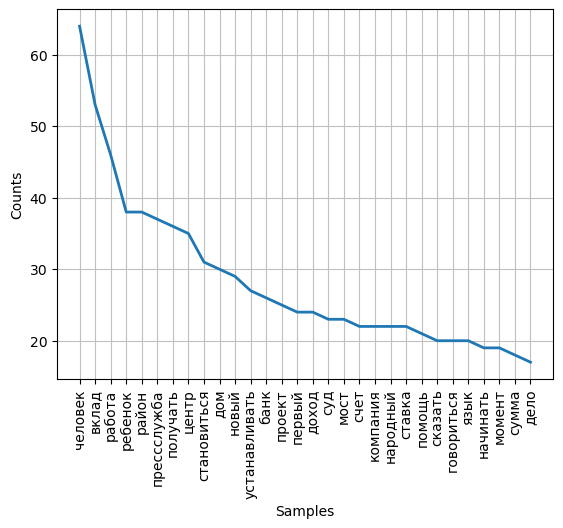

In [175]:
fdist.plot(30,cumulative=False)

In [179]:
# !pip install wordcloud

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
text_raw = " ".join(all_texts_2)

In [185]:
wordcloud = WordCloud().generate(text_raw)

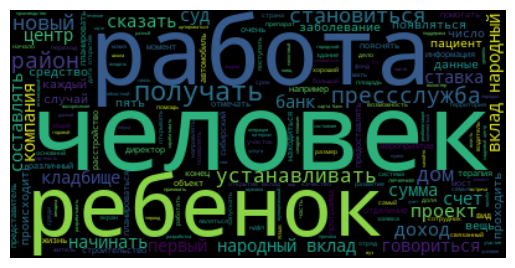

In [187]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TF-IDF

In [77]:
# !pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [243]:
# Контрольное удаление стоп-слов + преобразование списков обратно в строки
i = 0
add_stopwords = ['nan', 'r', 'ной']
for lists in df_tf['prep']:
    lst = [token.strip() for token in lists if token not in STOPWORDS_1]
    lst_2 = [token.strip() for token in lst if token not in add_stopwords]
    df_tf.prep[i] = ' '.join(lst_2)
    i += 1
print(df_tf)    

                                                 prep
0   новый бизнес открываться сибирь помощь сервис ...
1   четырехлетний мальчик погибать выпадать окно м...
2   строительство административный здание новый кл...
3   дарья фадеев волонтер поисковый отряд лизаалер...
4   выпускник госуниверситет тгу индонезия тур пар...
5   доля житель искать работа впервые начало снижа...
6   бывший мэр иван кляйн подавать жалоба верховны...
7   новорожденный проходить неонатальный скрининг ...
8   переменный облачность югозападный ожидать гидр...
9   инвестор завершать восстановление старинный де...
10  ветеринар нина крылов выхаживать ястребтетерев...
11  российский фонд круг добро предоставлять ребен...
12  преподаватель институт конфуций госуниверситет...
13  октябрьский районный суд обязывать собственник...
14  воспользоваться новый продукт промсвязьбанк за...
15  потребовать взыскивать компенсация моральный в...
16  наплавной мост зарабатывать переправа река обь...
17  дополнительный инструмен

C:\Users\User\AppData\Local\Temp\ipykernel_20560\1262084052.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.prep[i] = ' '.join(lst_2)


In [247]:
texts = df_tf.prep

In [251]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(texts)

In [253]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [255]:
# Вычисление TF-IDF
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

,tfidf
бизнес,0.368398
регистрация,0.273587
сервис,0.243376
дистанционный,0.221039
банк,0.205190
...,...
коренной,0.000000
коронавирус,0.000000
корректировать,0.000000
коррекция,0.000000


In [263]:
df_tf

,prep
0,новый бизнес открываться сибирь помощь сервис ...
1,четырехлетний мальчик погибать выпадать окно м...
2,строительство административный здание новый кл...
3,дарья фадеев волонтер поисковый отряд лизаалер...
4,выпускник госуниверситет тгу индонезия тур пар...
5,доля житель искать работа впервые начало снижа...
6,бывший мэр иван кляйн подавать жалоба верховны...
7,новорожденный проходить неонатальный скрининг ...
8,переменный облачность югозападный ожидать гидр...
9,инвестор завершать восстановление старинный де...


In [267]:
df2 = df1.sort_values(by=["tfidf"],ascending=False)

In [269]:
df2

,tfidf
бизнес,0.368398
регистрация,0.273587
сервис,0.243376
дистанционный,0.221039
банк,0.205190
...,...
коренной,0.000000
коронавирус,0.000000
корректировать,0.000000
коррекция,0.000000
